* Predicting if loan application will be approved or rejected
* classification problem

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

## 1. Dataset

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.shape

(4269, 13)

In [4]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Dataset insights:

- loan_id : unique identifier for each loan applicant
- no_of_dependents : number of dependents of applicant
- education : education of applicant
- self_employed : whether applicant is self employed or not
- income_annum : annual income of applicant
- loan_amount : ammount of loan applied for
- loan_term : term of the loan in months
- cibil_score : a measure of credit worthiness of applicant
- residential_assets_value : value of applicants residential assets
- commercial_assets_value : value of applicants commercial assets
- luxury_assets_value : value of applicants luxury assets
- bank_asset_value : value of applicants bank assets
- loan_status : status of loan application

-----------------------------------
* No null values
* 13 features and 4269 rows

## 2. Exploratory Data Analysis

In [9]:
numeric_features = df.select_dtypes(include=['int','float']).columns
numeric_features = numeric_features.drop('loan_id') #dropping loan_id feature because it is just a index for applications 
numeric_features

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

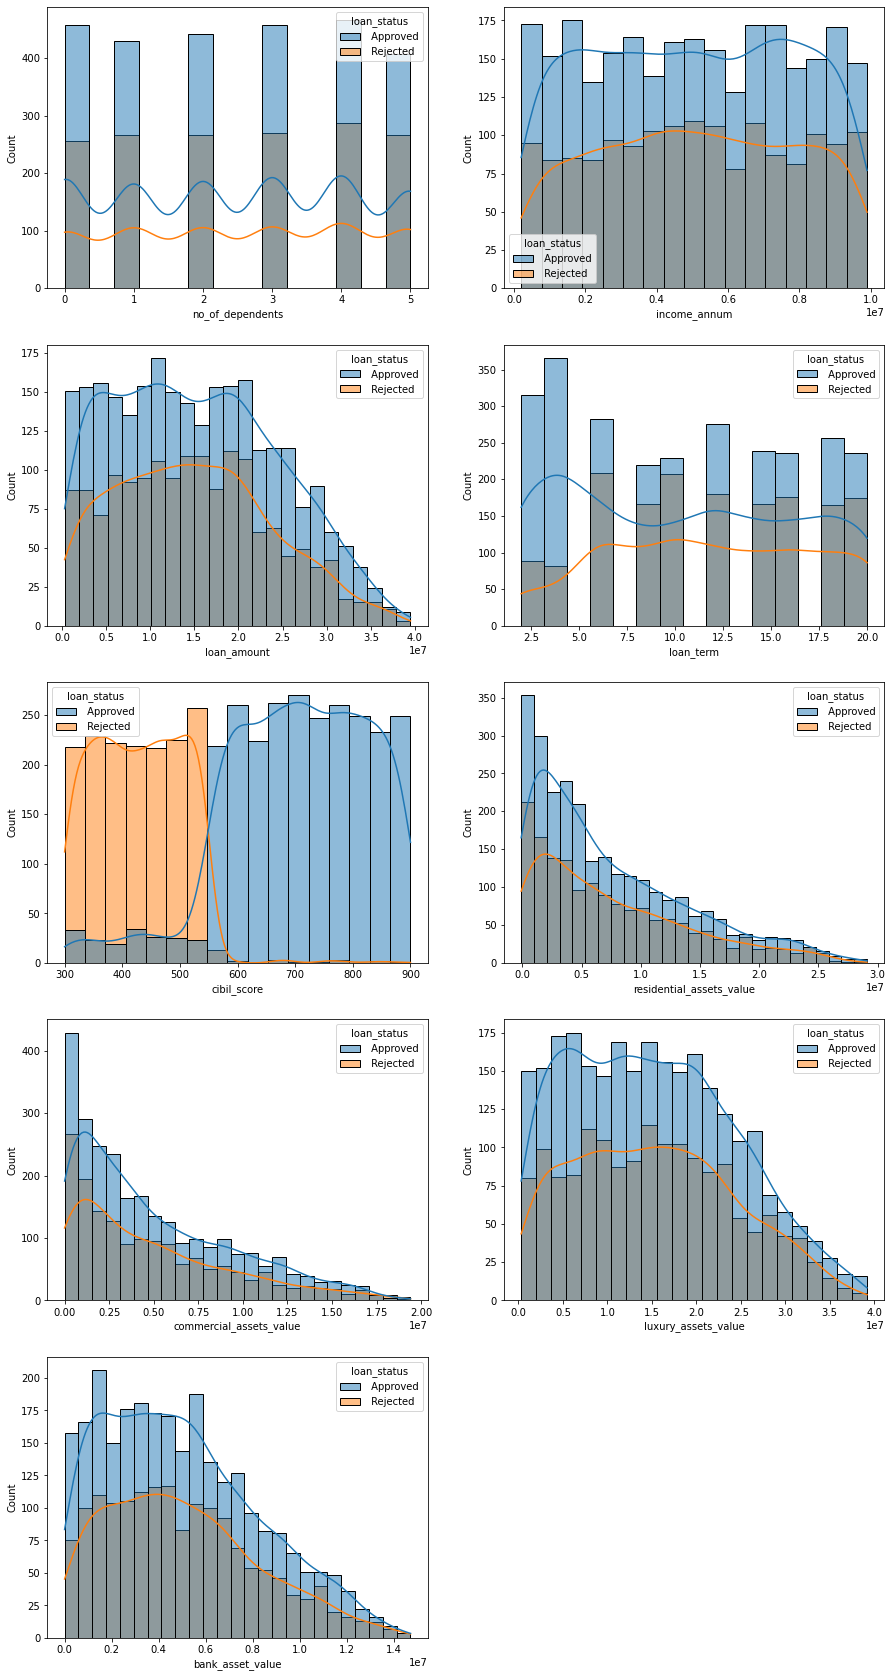

In [10]:
fig, axes = plt.subplots(5,2, figsize=(15,30))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data=df, x=col, hue='loan_status', kde=True, ax=ax)
    
if len(numeric_features)<10:
    for j in range(len(numeric_features),10):
        fig.delaxes(axes[j])
        

In [11]:
cat_features = df.select_dtypes(include=['object']).columns
cat_features

Index(['education', 'self_employed', 'loan_status'], dtype='object')

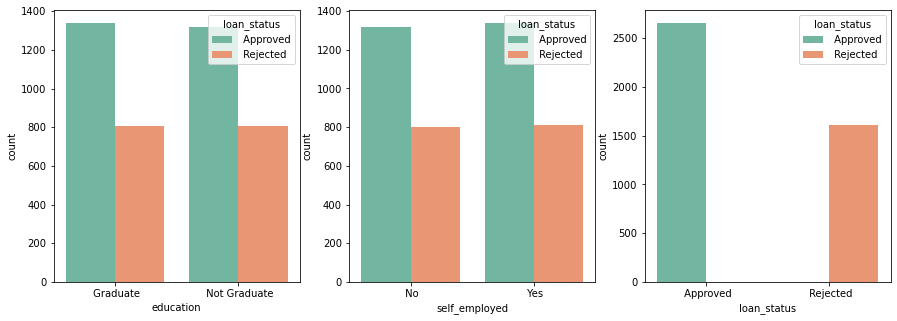

In [12]:
fig , axes = plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()

for i,col in enumerate(cat_features):
    ax = axes[i]
    sns.countplot(data=df, x=col,ax=ax, palette='Set2', hue='loan_status')
    

Text(0.5, 1.0, 'Income Vs Loan')

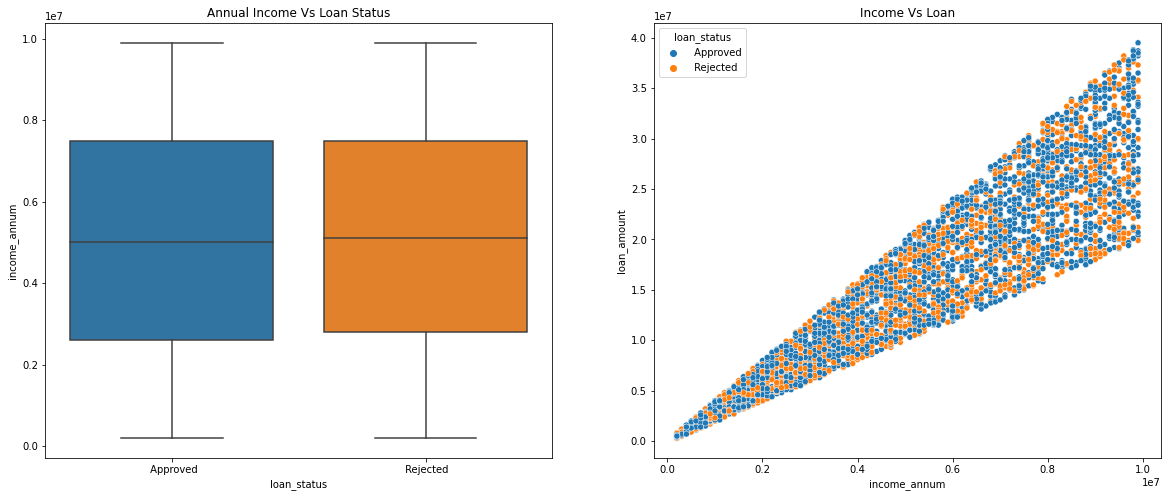

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='loan_status', y='income_annum')
plt.title('Annual Income Vs Loan Status')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.title('Income Vs Loan')

Insights
- loan status count : count of approved loan is higher than rejected
- cibil score : it appears that loan are more likely to be approved from applicants with higher cibil score
- annual income by loan status : there seems a lot of overlap in the income distribution of approved and rejected loans, suggesting that income alone may not be strong predictor of loan approval. the median income of approved loans seems to be slightly higher that the median income of rejected loans.
- loan ammount vs annual income : there is no clear pattern in the relationship between loan ammount and annual income. it appears that loan approval does not strictly depend on these variables, as there are approved and rejected loans in entire range of income and loan amount. 

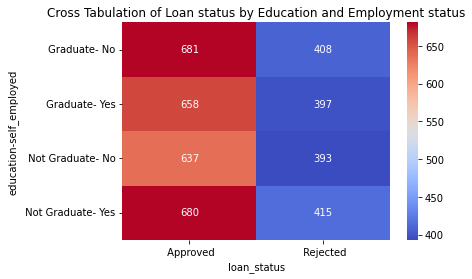

In [14]:
#cross tabulation heatmap

cross_tab = pd.crosstab(index=[df.education, df.self_employed], columns=df.loan_status)
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cross Tabulation of Loan status by Education and Employment status')
plt.show()

<AxesSubplot:>

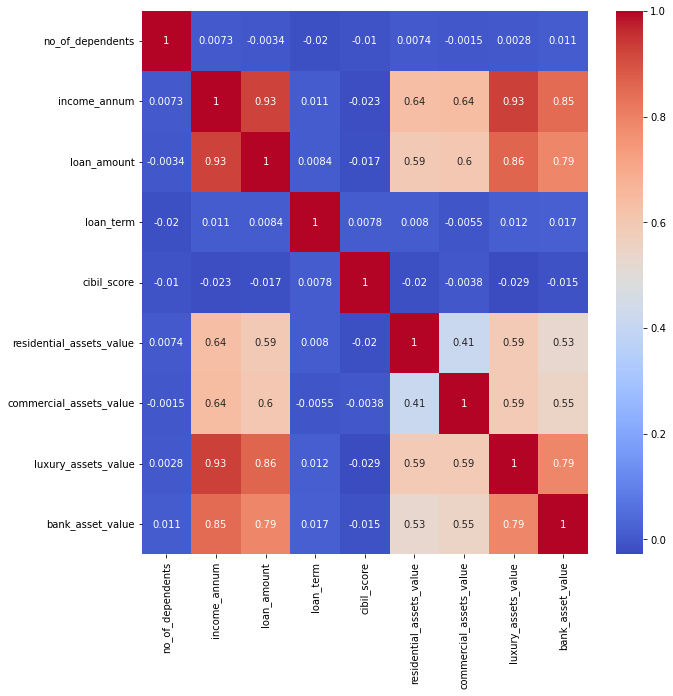

In [15]:
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Insights
- strong positive correlation between loan_amount and income_amount, it shows apllicant with higher income is more likely to apply for larger loans
- loan_amount also have moderate positive correlation with residential_asset , commercial_asset, luxury_asset and bank_asset values. this suggest applicants with higher values of thease assets tends to apply for larger loans
- cibil_score shows slighly positive correlation with income_annum and loan_amount, indicating that applicants with higher cibil score tend to have higher income and applies for larger loans
- loan_term does not seem to be strongly correlated with any of the other variables

## 3. Feature Engineering

In [16]:
numeric_features = numeric_features.drop('no_of_dependents')

#Define preprocessor

preprocessor = ColumnTransformer(
    transformers=[('nums', StandardScaler(), numeric_features),
                 ('cat', OneHotEncoder(), ['education', 'self_employed'])])

In [17]:
#Define Label encoder for target column
le = LabelEncoder()

In [18]:
#seperate features and target columns
X = df.drop(columns='loan_status')
y = le.fit_transform(df['loan_status'])

In [19]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

In [20]:
#fit and transform training data with preprocessor
X_train_preprocess = preprocessor.fit_transform(X_train)
X_test_preprocess = preprocessor.transform(X_test)

In [21]:
X_train_preprocess.shape , X_test_preprocess.shape

((3415, 12), (854, 12))

## 4. Model Building

In [22]:
#Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=34),
    'Decision Tree': DecisionTreeClassifier(random_state=34),
    'Support Vector Machine': SVC(random_state=34),
    'K-nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=34)
}

#empty dictionary to restore results
results = {}

In [23]:
#train and evaluate each model

for model_name, model in models.items():
    print('Processing:', model_name)
    
    model.fit(X_train_preprocess, y_train)
    y_pred = model.predict(X_test_preprocess)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {'Accuracy': accuracy,
                          'Classification Report': report,
                          'Confusion Matrix': conf_matrix}
    
    print(f'{model_name}:\n')
    print(f'Accuracy:{accuracy}')
    print(f'Classification Report:{report}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print('\n'+ '-'*50+'\n')
    

Processing: Logistic Regression
Logistic Regression:

Accuracy:0.9238875878220141
Classification Report:              precision    recall  f1-score   support

    Approved       0.94      0.94      0.94       528
    Rejected       0.90      0.90      0.90       326

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
[[494  34]
 [ 31 295]]

--------------------------------------------------

Processing: Decision Tree
Decision Tree:

Accuracy:0.9765807962529274
Classification Report:              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       528
    Rejected       0.98      0.96      0.97       326

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[521   7]
 [ 13 313]]

--------------

In [24]:
best_model_name = None
best_model_accuracy = 0

for model_name, result in results.items():
    if result['Accuracy'] > best_model_accuracy:
        best_model_name = model_name
        best_model_accuracy = result['Accuracy']
        
print(f'The best model  is {best_model_name} with the accuracy of {best_model_accuracy}')
    

The best model  is Random Forest with the accuracy of 0.9812646370023419


#### Hyper-parameter Tuning

In [25]:
param_grids = {
    'Logistic Regression' : {'C':[0.1,1,10]},
    'Decision Tree' : {'max_depth':[None,10,20],
                      'min_samples_split':[2,5,10]},
    'Support Vector Machine':{'C':[0.1, 1, 10, 20, 50, 100],
                             'gamma': ['scale','auto']},
    'K-nearest Neighbors':{'n_neighbors':[5,7,9,11,15],
                          'weights':['uniform','distance']},
    'Random Forest':{'n_estimators':[50,100,200],
                    'max_depth':[None,10,20],
                    'min_samples_split':[2,5,10]}
}


In [26]:
#perform hyper-paramter tuning for each model
best_models = {}

for model_name, model in models.items():
    grid_search = GridSearchCV( model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_preprocess,y_train)
    best_models[model_name] = grid_search.best_estimator_
    

In [27]:
best_models

{'Logistic Regression': LogisticRegression(C=10, random_state=34),
 'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=34),
 'Support Vector Machine': SVC(C=50, random_state=34),
 'K-nearest Neighbors': KNeighborsClassifier(n_neighbors=15, weights='distance'),
 'Random Forest': RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=34)}

In [28]:
results_tunes ={}

for model_name, model in best_models.items():
    print(f'Processing {model_name}.....')
    
    model.fit(X_train_preprocess, y_train)
    y_pred = model.predict(X_test_preprocess)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results_tunes[model_name] = {'Accuracy': accuracy,
                          'Classification Report': report,
                          'Confusion Matrix': conf_matrix}
    
    print(f'{model_name}:\n')
    print(f'Accuracy:{accuracy}')
    print(f'Classification Report:{report}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print('\n'+ '-'*50+'\n')
    

Processing Logistic Regression.....
Logistic Regression:

Accuracy:0.9227166276346604
Classification Report:              precision    recall  f1-score   support

    Approved       0.94      0.93      0.94       528
    Rejected       0.89      0.90      0.90       326

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
[[493  35]
 [ 31 295]]

--------------------------------------------------

Processing Decision Tree.....
Decision Tree:

Accuracy:0.9812646370023419
Classification Report:              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       528
    Rejected       0.98      0.97      0.98       326

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[523   5]
 [ 11 315]]

------

In [29]:
best_model_name_tuned = None
best_model_accuracy_tuned = 0

for model_name, result in results_tunes.items():
    if result['Accuracy'] > best_model_accuracy_tuned:
        best_model_name_tuned = model_name
        best_model_accuracy_tuned = result['Accuracy']
        
print(f'The best model  is {best_model_name_tuned} with the accuracy of {best_model_accuracy_tuned}')

The best model  is Decision Tree with the accuracy of 0.9812646370023419


In [30]:
#end